
# Project: Investigate the results of a Stroop task

## Table of Contents
<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question1">Question 1: Identify the independent and dependent variables</a></li>
<li><a href="#question2">Question 2: </a></li>
<ol>
<li><a href="#question2a">Establish the hypotheses of the test</a></li>
<li><a href="#question2b">Define the statistical test to be performed</a></li>
</ol>
<li><a href="#question3">Question 3: Report some descriptive statistics of the data</a></li>
<li><a href="#question4">Question 4: Plotting of the results</a></li>
<li><a href="#question5">Question 5: Perform the statistical test and interpret the results</a></li>
<li><a href="#references">References</a></li>
</ol>

<a id='intro'></a>
## 1. Introduction

The objective of this project is to perform a statistical test on the results obtained from a Stroop task. A Stroop task is a test designed to measure the *delay in the reaction time in the performance of a task which occurs due to a mismatch in the stimuli provided* (ref. <a href="#ref1">[1]</a>). This cognitive interference is known as the Stroop effect.

In particular, the test here presented is designed to measure the time needed by a person to name the color of the font of a set of printed color-naming words in two different states: one where the color of the font matches the word (e.g. <font color='red'>Red</font>) and one where the font color mismatches the one named in the word (e.g. <font color='blue'>Green</font>). An example of the test can be found in the link provided in reference <a href="#ref2">[2]</a>.

In order to gain some more understanding of this phenomenom, I have decided to take the test and note here the obtained results:
<ul>
<li> Time needed to name the colors matching the printed words (i.e. congruent task): $t_C = 14.97$ seconds</li>
<li> Time needed to name the colors not matching the printed words (i.e. incongruent task): $t_I = 22.86$ seconds</li>
</ul>

These results seem to indicate that it takes longer to name the colors when the words are not matching the color of the font as when they are the same. This might serve as an indication of the alternative hypothesis to be used in the test.

To perform the statistical test, I will make use of the data provided by Udacity containing the results from a number of participants in the task (ref. <a href="#ref2">[2]</a>), which I will import into a Pandas DataFrame to ease the subsequent calculations. Although I have performed the task myself, I will not add my results to the available data as I cannot ensure that I have performed the test in the same conditions as the other participants.

In [1]:
# The first step is to load the basic packages that I will use throughout the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# I also include the following line to ensure that the graphs are plotted as output of their corresponding cells
%matplotlib inline

In [2]:
# The next step is to import the .csv file containing the results of the study
data_path = '../Files/stroopdata.csv'
df_stroop = pd.read_csv(data_path)

df_stroop

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


<a id='question1'></a>
## Question 1: Identify the variables
Based on the description given in the project instructions, we can conclude the following:
<ul>
<li>The **independent** variable will be the type of task to perform: congruent or incogruent words</li>
<li>The **dependent** variable will be the time it takes each participant to name the ink colors in the task (equally-sized lists)</li>
</ul>



<a id='question2a'></a>
## Question 2a: Establish the hypotheses of the test

The phenomenon to test is whether or not the performance of the Stroop task with incongruent words takes longer than the congruent one. Mathematically speaking, we want to find out if the average time it takes a person to name the incongruent word colors ($\mu _I$) is larger than the average it takes to name the congruent ones ($\mu _C$). Taking this into account, we will assume the null hypothesis, $H_0$, to be that there is no difference between both means ($\mu _C = \mu _I$). The alternative hypothesis, $H_1$, should therefore be that the average of the incongruent Stroop task ($\mu _I$) is larger than that of the congruent one ($\mu _C$).

<ol>
<li>$H_0: \mu _I = \mu _C$ (or $\mu _D = 0$)</li>
<li>$H_1: \mu _I > \mu _C$ (or $\mu _D > 0$)</li>
</ol>

where $\mu _D = \mu _I - \mu _C$. For the sake of simplicity in the notation, I will perform the statistical test on the distribution of the differences ($\mu _D$).

<a id='question2b'></a>
## Question 2b: Define the statistical test to be performed

Given that we want to we want to infer properties of a population which are unknown &ndash; i.e. the average time it takes any person to complete each of the Stroop tasks &ndash; based on the averages of a limited sample of people (n = 24), the most appropriate statistical test to perform would be a t-test. 

Since the alternative hypothesis of the test is only meant to test if $\mu_ I$ is larger than $\mu _C$, the test will be a one-tailed t-test in the positive direction (or upper-tailed t-test), as we are only interested in one of the regions of the distribution.

The test to be performed can be defined as a *one-tailed paired sample t-test*, since we are measuring the performance of each individual twice: once in the congruent task and another one in the incongruent task.

<a id='question3'></a>
## Question 3: Report some descriptive statistics of the data

In order to compute the descriptive statistics of the data I will make use of the Pandas function *describe()*, which generates a series of statistics for a DataFrame array &ndash; including statistics for central tendency and dispersion.

In [3]:
df_stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [4]:
# Compute the sample means of the Congruent and Incongruent distributions
xbar_c = round(df_stroop['Congruent'].mean(), 2)
print xbar_c

xbar_i = round(df_stroop['Incongruent'].mean(), 2)
print xbar_i

14.05
22.02


The results above show the following results in terms of central tendency:
<ul>
<li> Average time needed by the test subjects to complete the **congruent** Stroop task: $\bar{x} _C = 14.05$ seconds</li>
<li> Average time needed by the test subjects to complete the **incongruent** Stroop task: $\bar{x} _I = 22.02$ seconds</li>
</ul>

This confirms that the alternative hypothesis is defined in the right direction, since $\bar{x} _I > \bar{x} _C$.

In terms of variability, we have the values of the standard deviation of the time needed to complete each task type:
<ul>
<li> $s _C = 3.56$ seconds</li>
<li> $s _I = 4.80$ seconds</li>
</ul>

It is worth mentioning that the standard deviations computed with the Pandas *std()* function contain the so-called Bessel's correction, which corrects the bias in the estimation of the population variance from the variance of a sample ($s^2$). See refences <a href="#ref2">[2]</a> and <a href="#ref3">[3]</a> for more information.

Additionally, we see that the sample size is $n = 24$.

Finally, in order to perform the statistical test, we need to compute the distribution of the differences. For this, I will simply generate a new column in the DataFrame subtracting the congruent values from the incongruent ones.

In [5]:
# Compute a new column with the differences between the Incongruent and Congruent values
df_stroop['Diff'] = df_stroop['Incongruent'] - df_stroop['Congruent']
df_stroop

,Congruent,Incongruent,Diff
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134
5,12.238,20.878,8.640
6,14.692,24.572,9.880
7,8.987,17.394,8.407
8,9.401,20.762,11.361
9,14.480,26.282,11.802


In [6]:
# Compute the mean of the differences
xbar_d = round(df_stroop['Diff'].mean(), 2)
print xbar_d

7.96


In [7]:
# Compute the standard deviation of the differences (inclusing Bessel's correction)
s_d = round(df_stroop['Diff'].std(), 2)
print s_d

4.86


Based on the obtained results, we see that the mean of the distribution of differences is $\bar{x} _D = 7.96$ seconds and that the standard deviation is $s _D = 4.86$ seconds. These values will be needed to compute the t value for the test.

<a id='question4'></a>
## Question 4: Plotting of the results

In order to visualize the data, I will first produce a histogram showing the distributions of the congruent and incongruent tasks.

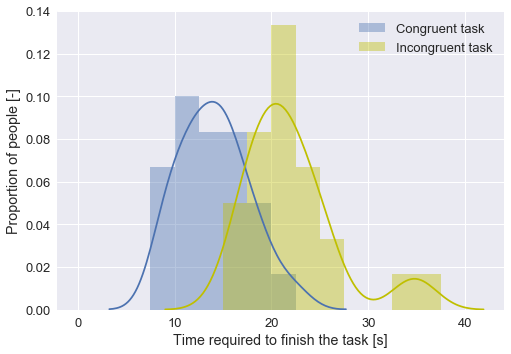

In [8]:
# Produce a histogram with the distributions of the Congruent and Incongruent tasks
sns.set()
sns.set_context('notebook', font_scale=1.3)
hist_bins = np.linspace(0, 40, 17)

ax = plt.gca()
sns.distplot(df_stroop['Congruent'], bins=hist_bins, ax=ax, label='Congruent task')
sns.distplot(df_stroop['Incongruent'], bins=hist_bins, color='y', ax=ax, label='Incongruent task')
plt.legend()
plt.xlabel('Time required to finish the task [s]')
plt.ylabel('Proportion of people [-]')

From this plot, we can observe that the results of the congruent task follow a distribution close to a Gaussian one &ndash; with most of the values close to the mean and the frequency of the results decreasing as we move away from the mean. The incongruent task, however, presents two peaks of data: one close to its average and one in the range between 30 and 40 seconds. This second peak is significantly lower than the one around the average, which seems to indicate the presence of some outliers in the data &ndash; i.e. some participants with abnormally large values in the incongruent task.

Next, I would like to plot the distribution of the differences, in order to see if it follows a normal-like distribution.

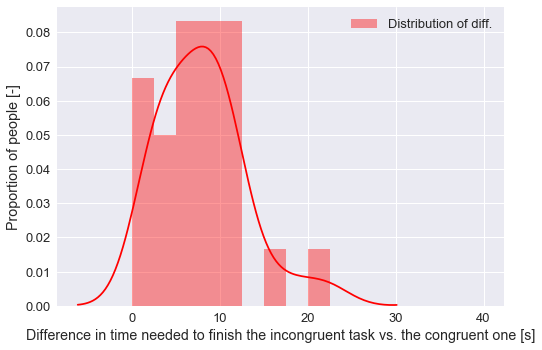

In [9]:
ax = plt.gca()
sns.distplot(df_stroop['Diff'], bins=hist_bins, color='r', ax=ax, label='Distribution of diff.')
plt.legend()
plt.xlabel('Difference in time needed to finish the incongruent task vs. the congruent one [s]')
plt.ylabel('Proportion of people [-]')

The distribution of the differences presents a less normal-like distribution, probably due to the outliers present in the incongruent task's results.

<a id='question5'></a>
## Question 5: Perform the test and interpret the results

The first step to perform the t-test is to obtain the critical t value ($t^*$). For this, we need to define a significance level ($\alpha$), which represents the probability of rejecting the null hypothesis when it is true (or  type I error). Since we are dealing with a one-tailed t-test, but we are not studying any safety-critical effect, a significance level of 2.5% should provide a good compromise between error types I and II (false positive and false negative respectively):  

<center>$\alpha = 0.025$</center>

In order to obtain $t^*$, we also need the number of degrees of freedom of the data, which depends on the size of the sample:

<center>$df = n - 1 = 23$</center>

With the significance level and the degrees of freedom, we can read the corresponding critical value from the table given in reference <a href="#ref4">[4]</a>:

<center>$t^* = 2.069$</center>

Next, we can compute the t value for this test by dividing the sample mean ($\bar{x} _D$) by the standard error of the mean ($s_\bar{x}$).

\begin{equation*}
t = \frac{\bar{x} _D}{s_\bar{x}}
\end{equation*}

The standard error of the mean is computed as the ratio between the standard deviation of the sample and the square root of the sample size:

\begin{equation*}
s_\bar{x} = \frac{s_D}{\sqrt{n}}
\end{equation*}

In [10]:
# Compute the standard error of the mean
s_xbar = s_d / np.sqrt(24)
print s_xbar

0.992043345827


In [11]:
# Compute the t value
t = xbar_d / s_xbar
print t

8.02384294344


The value computed above corresponds to the t value of this test:

\begin{equation*}
t = \frac{\bar{x} _D}{s_\bar{x}} = \frac{7.96}{0.992} = 8.024
\end{equation*}

By comparing the computed t value to the critical t value, we obtain the following:

\begin{equation*}
t = 8.024 > 2.069 = t^*
\end{equation*}

This result means that we can reject the null hypothesis (with a confidence level of 2.5%) and that, therefore, we can accept the alternative hypothesis: the average time it takes a person to name the incongruent word colors is larger than the average it takes to name the congruent ones. In other words, based on the statistical results, we can confirm that it is easier to name the color in which a word is printed when the meaning of the word matches the color of the font than when they do not match.

<a id='references'></a>
## 7. References

<ol>
<li><a id='ref1'>https://en.wikipedia.org/wiki/Stroop_effect</a></li>
<li><a id='ref2'>https://faculty.washington.edu/chudler/java/ready.html</a></li>
<li><a id='ref3'>https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view</a></li>
<li><a id='ref3'>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html#pandas.DataFrame.std</a></li>
<li><a id='ref3'>https://en.wikipedia.org/wiki/Bessel%27s_correction</a></li>
<li><a id='ref4'>https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg</a></li>
</ol>